In [1]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import spatial as sp

Generate a random galaxy: locations of planets that will eventually support intelligent life

In [3]:
Nstars = 200

GHZ_inner = 20000.
GHZ_outer = 60000.

r = np.sqrt(np.random.rand(Nstars)*GHZ_outer**2 + GHZ_inner**2)
o = np.random.rand(Nstars)*2.*np.pi

x = r * np.cos(o)
y = r * np.sin(o)
l = np.zeros(Nstars)  # 1:active civilization, 0: inactive/inhabited star
t_start = np.zeros(Nstars)
t_end = np.zeros(Nstars)

M = np.column_stack([x, y])

In [6]:
M?

In [12]:
M = [0, 0]

In [14]:
M = np.vstack([M, [1,1]])

In [19]:
M[1]

array([1, 1])

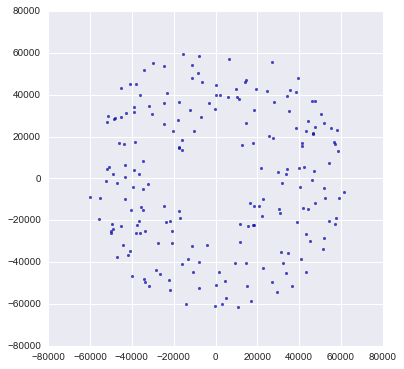

In [3]:
fig = plt.figure(figsize=(6,6))
plt.rcParams['legend.fontsize'] = 10   

plt.scatter(x, y, c='blue', alpha=0.75, edgecolors=None, s=7 )
plt.show()

1. draw a planet and activate message emmision and listening
2. draw activity time span
3. compute lightning sphere
4. buscar si hay algún otro planeta activo dentro de la esfera

In [47]:
M = np.column_stack([x, y])
tree = sp.cKDTree( data=M ) 

In [48]:
acc = np.zeros(Nstars)  # 1:active communicating civilization, 0: inactive/inhabited star
t_a = np.zeros(Nstars) # awakning
t_s = np.zeros(Nstars) # stationary
t_b = np.zeros(Nstars) # blackout

Simulation (single step):

variable "t" is time.

Parameters:
* tau = Mean time between emergent civilizations
* tL = Mean lifetime of a civilization

In [49]:
t = 0.
tau = 5000 #yr, mean lifetime of a ETI
lambd = 50000.  #yr, mean time until next CETI appear
D = 5000.  # light year, maximum distance of detectable signals
np.random.exponential(lambd, 1)

array([ 34678.20040889])

In [50]:
i = np.random.choice(range(Nstars))
idx = tree.query_ball_point( [x[i],y[i]] , D)
idx.pop(idx.index(i))
idx

[1, 91, 114, 176, 58]

In [51]:
l[idx]

array([ 0.,  0.,  0.,  0.,  0.])

### Ahora recorremos el tiempo:

In [52]:
t = 0.  # initializea
tau = 5000 #yr, mean lifetime of a ETI
lambd = 50000.  #yr, mean time until next CETI appear
D = 5000.  # light year, maximum distance of detectable signals

tmax = 1000000.

ts = []

while (t<tmax):
    t_on = np.random.exponential(lambd, 1)
    t_off = np.random.exponential(tau, 1)
    tnew = min(t_on, t_off)
    t = t + tnew
    ts.append(t)

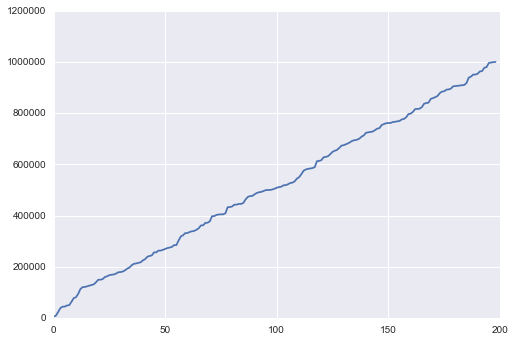

In [53]:
plt.plot(ts)
plt.show()

In [54]:
t = 0.  # initializea
tau = 5000 #yr, mean lifetime of a ETI
lambd = 50000.  #yr, mean time until next CETI appear
D = 5000.  # light year, maximum distance of detectable signals

tmax = 1000000.  # maximo tiempo que dura la simulación

#en el lazo:
# CETI: communicating extraterrestrial intelligence
# MDCC: maximum distance for communication capacity
# t_on: salto de tiempo hasta que aparece una nueva CETI
# t_off: tiempo en el que desaparece una CETI del conjunto de las activas
# t_sph: tiempo en el que algunas de las CETI activas alcanza la maxima distancia de transmisión

Hay que calcular:
    
    1. Los próximos tiempos de emergencia de CETI
    2. los próximos tiempos en los que las CETI activas alcanzan la esfera de máximo alcance
    3. los próximos tiempos en los que las CETI activas desaparecen

Distinguimos los siguientes casos:
    
    1. El proximo evento es que emerge una nueva CETI
        - actualizar la variable t
        - agregar a la máscara
        - eliminar de la lista de candidatos
        - sortear la duración
    2. el próximo evento es que una CETI alcanza la esfera
        - actualizar la variable t
    3. el próximo evento es que una CETI desaparece
        - actualizar la variable t

In [96]:
acc = np.array([False]*Nstars)    # True:active communicating civilization, False: inactive/inhabited star
t_a = np.zeros(Nstars)  # awakning
t_s = np.zeros(Nstars)  # stationary
t_b = np.zeros(Nstars)  # blackout
t_start = np.zeros(Nstars)
t_end = np.zeros(Nstars)

acc[21] = True

In [97]:
t = 0.
ts = []
t_last_CETI = 0.

In [98]:
def update_awakening(t, t_s_min_idx, t_b_min_idx):
    
    global t_last_CETI
    global t_start
    global acc
    
    t_last_CETI = t
    i = np.random.choice(range(Nstars))
    t_start[i] = t
    acc[i] = True
    print 'wide awake!', t
    
def update_sphere(t, t_s_min_idx, t_b_min_idx):
    print 'sphere!'
    
def update_blackout(t, t_s_min_idx, t_b_min_idx):
    
    global t_end
    
    t_end[t_b_min_idx] = t
    print 'blackout'
    
options = {0 : update_awakening, 1 : update_sphere, 2 : update_blackout}

In [99]:
t = 0.
ts = []
t_last_CETI = 0.

#while (t<tmax):
while (t<2):
    
    # sortear el tiempo hasta que aparece la próxima CETI
    t_on_next = np.random.exponential(lambd, 1)
    t_a_min = t_last_CETI + t_on_next    

    # buscar el proximo tiempo en que se alcanza la esfera
    # completar la máscara con la lista de pares en contacto causal
    
    T_s = np.ma.array(t_s, mask=~acc)
    t_s_min_idx = np.ma.where(T_s == T_s.min())
    t_s_min = t_s[t_s_min_idx]

    # buscar el proximo tiempo de desaparicion de una CETI activa
    # completar la máscara con la lista de pares en contacto causal
    T_b = np.ma.array(t_b, mask=~acc)
    t_b_min_idx = np.ma.where(T_b == T_b.min())
    t_b_min = t_b[t_b_min_idx]
    
    mins = np.array([t_a_min, t_s_min, t_b_min])
    
    print mins
    filt = mins > 0.
    mn = np.ma.array(mins, mask=~filt)
    mn_idx = np.ma.where(mn == mn.min())[0][0]
    
    t = t + mins[mn_idx]
    ts.append(t)
    
    t = options[mn_idx](t, t_s_min_idx, t_b_min_idx)
    

[[ 15519.72189108]
 [     0.        ]
 [     0.        ]]
wide awake! [ 15519.72189108]


In [11]:
    #______________________________________________________________
    # CASO 1:  el proximo evento es que aparece una CETI
    
    # guardar el tiempo del ultimo awakening
    t_last_CETI = t + t_on
    
    # sortear el lugar en donde aparece
    i = np.random.choice(range(Nstars))
    # marcarla como CETI activa
    l[i] = 1
    
    # sortear el tiempo que permanecerá activa
    t_off = np.random.exponential(tau, 1)
    # guardar el tiempo de aparición y desaparición
    t_start[i] = t
    t_end[i] = t + t_off
    
    # actualizar el tiempo: para eso buscar el menor salto entre
    #   t+t_on 
    #   t_off de todas las CETI activas
    #   t_sph de todas las CETI activas

    #______________________________________________________________
    # CASO 2:  el proximo evento desaparece una CETI

    #______________________________________________________________
    # CASO 3:  el proximo evento es que una CETI alcanza su MDCC
    
    
    
    
    tnew = min(t_on, t_off)
    t = t + tnew
    ts.append(t)

    idx = tree.query_ball_point( [x[i],y[i]] , D)
    idx.pop(idx.index(i))
    
    
    
    # saltar en el tiempo
    t = t + t_on